<a href="https://colab.research.google.com/github/sumitarora92/Internet-Service-Provider-Customer-Churn/blob/Internet-Service-Provider-CustoInternet-Service-Provider-Customer-Churnmer-Churn/Internet_Service_Provider_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('internet_churn.csv.csv')

In [5]:
df

,id,tv_subscriber,movie_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0.0,8.4,2.3,0.0,0.0
1,18,0,0,8.22,0,NaN,0.0,0.0,0.0,0.0,1.0
2,23,1,0,8.91,16,0.00,0.0,13.7,0.9,0.0,1.0
3,27,0,0,6.87,21,NaN,1.0,0.0,0.0,0.0,1.0
4,34,0,0,6.39,0,NaN,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
57597,1348998,1,0,1.22,14,0.75,0.0,36.6,2.4,0.0,0.0
57598,1349014,1,0,1.22,14,0.75,0.0,114.2,7.4,0.0,0.0
57599,1349028,1,0,1.22,14,0.75,0.0,113.4,16.2,0.0,0.0
57600,1349055,1,0,1.22,12,0.99,0.0,105.1,8.9,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57602 entries, 0 to 57601
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     57602 non-null  int64  
 1   tv_subscriber          57602 non-null  int64  
 2   movie_subscriber       57602 non-null  int64  
 3   subscription_age       57602 non-null  float64
 4   bill_avg               57602 non-null  int64  
 5   remaining_contract     36670 non-null  float64
 6   service_failure_count  57601 non-null  float64
 7   download_avg           57516 non-null  float64
 8   upload_avg             57516 non-null  float64
 9   download_over_limit    57601 non-null  float64
 10  churn                  57601 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 4.8 MB


In [7]:
df.dropna(subset=['download_avg'], how='any', inplace=True)
df.dropna(subset=['upload_avg'], how='any', inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57516 entries, 0 to 57600
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     57516 non-null  int64  
 1   tv_subscriber          57516 non-null  int64  
 2   movie_subscriber       57516 non-null  int64  
 3   subscription_age       57516 non-null  float64
 4   bill_avg               57516 non-null  int64  
 5   remaining_contract     36632 non-null  float64
 6   service_failure_count  57516 non-null  float64
 7   download_avg           57516 non-null  float64
 8   upload_avg             57516 non-null  float64
 9   download_over_limit    57516 non-null  float64
 10  churn                  57516 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 5.3 MB


In [9]:
def outlier(data, col):
   Q1 = data[col].quantile(0.25)
   Q3 = data[col].quantile(0.75)
   IQR = Q3 - Q1
   data = data.loc[~((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))),]
   return data

In [10]:
df = outlier(df,'subscription_age')
df

,id,tv_subscriber,movie_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
3,27,0,0,6.87,21,NaN,1.0,0.0,0.0,0.0,1.0
4,34,0,0,6.39,0,NaN,0.0,0.0,0.0,0.0,1.0
7,84,0,0,5.48,14,NaN,1.0,0.0,0.0,0.0,1.0
12,213,0,0,6.64,10,NaN,0.0,0.0,0.0,0.0,1.0
13,222,0,0,5.53,14,NaN,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
57596,1348955,1,0,1.22,13,0.31,0.0,8.9,0.7,0.0,0.0
57597,1348998,1,0,1.22,14,0.75,0.0,36.6,2.4,0.0,0.0
57598,1349014,1,0,1.22,14,0.75,0.0,114.2,7.4,0.0,0.0
57599,1349028,1,0,1.22,14,0.75,0.0,113.4,16.2,0.0,0.0


In [11]:
df = outlier(df, 'bill_avg' )
df

,id,tv_subscriber,movie_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
3,27,0,0,6.87,21,NaN,1.0,0.0,0.0,0.0,1.0
4,34,0,0,6.39,0,NaN,0.0,0.0,0.0,0.0,1.0
7,84,0,0,5.48,14,NaN,1.0,0.0,0.0,0.0,1.0
12,213,0,0,6.64,10,NaN,0.0,0.0,0.0,0.0,1.0
13,222,0,0,5.53,14,NaN,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
57596,1348955,1,0,1.22,13,0.31,0.0,8.9,0.7,0.0,0.0
57597,1348998,1,0,1.22,14,0.75,0.0,36.6,2.4,0.0,0.0
57598,1349014,1,0,1.22,14,0.75,0.0,114.2,7.4,0.0,0.0
57599,1349028,1,0,1.22,14,0.75,0.0,113.4,16.2,0.0,0.0


In [12]:
df = outlier(df, 'download_avg' )
df

,id,tv_subscriber,movie_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
3,27,0,0,6.87,21,NaN,1.0,0.0,0.0,0.0,1.0
4,34,0,0,6.39,0,NaN,0.0,0.0,0.0,0.0,1.0
7,84,0,0,5.48,14,NaN,1.0,0.0,0.0,0.0,1.0
12,213,0,0,6.64,10,NaN,0.0,0.0,0.0,0.0,1.0
13,222,0,0,5.53,14,NaN,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
57596,1348955,1,0,1.22,13,0.31,0.0,8.9,0.7,0.0,0.0
57597,1348998,1,0,1.22,14,0.75,0.0,36.6,2.4,0.0,0.0
57598,1349014,1,0,1.22,14,0.75,0.0,114.2,7.4,0.0,0.0
57599,1349028,1,0,1.22,14,0.75,0.0,113.4,16.2,0.0,0.0


In [13]:
df = outlier(df, 'upload_avg' )

In [16]:
df.agg('nunique')

id                       48436
tv_subscriber                2
movie_subscriber             2
subscription_age           751
bill_avg                    39
remaining_contract         225
service_failure_count       17
download_avg              1264
upload_avg                  90
download_over_limit          8
churn                        2
dtype: int64

In [14]:
df = df.reset_index()
df

,index,id,tv_subscriber,movie_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,3,27,0,0,6.87,21,NaN,1.0,0.0,0.0,0.0,1.0
1,4,34,0,0,6.39,0,NaN,0.0,0.0,0.0,0.0,1.0
2,7,84,0,0,5.48,14,NaN,1.0,0.0,0.0,0.0,1.0
3,12,213,0,0,6.64,10,NaN,0.0,0.0,0.0,0.0,1.0
4,13,222,0,0,5.53,14,NaN,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48431,57595,1348942,1,0,1.91,37,NaN,0.0,65.3,5.6,0.0,1.0
48432,57596,1348955,1,0,1.22,13,0.31,0.0,8.9,0.7,0.0,0.0
48433,57597,1348998,1,0,1.22,14,0.75,0.0,36.6,2.4,0.0,0.0
48434,57598,1349014,1,0,1.22,14,0.75,0.0,114.2,7.4,0.0,0.0


In [15]:
del df['index']
df

,id,tv_subscriber,movie_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,27,0,0,6.87,21,NaN,1.0,0.0,0.0,0.0,1.0
1,34,0,0,6.39,0,NaN,0.0,0.0,0.0,0.0,1.0
2,84,0,0,5.48,14,NaN,1.0,0.0,0.0,0.0,1.0
3,213,0,0,6.64,10,NaN,0.0,0.0,0.0,0.0,1.0
4,222,0,0,5.53,14,NaN,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
48431,1348942,1,0,1.91,37,NaN,0.0,65.3,5.6,0.0,1.0
48432,1348955,1,0,1.22,13,0.31,0.0,8.9,0.7,0.0,0.0
48433,1348998,1,0,1.22,14,0.75,0.0,36.6,2.4,0.0,0.0
48434,1349014,1,0,1.22,14,0.75,0.0,114.2,7.4,0.0,0.0


In [17]:
df.index.name = 'User'

In [18]:
x = len(df[df['churn']== 1])
y = len(df[df['churn']== 0])
print(x)
print(y)

33286
15150


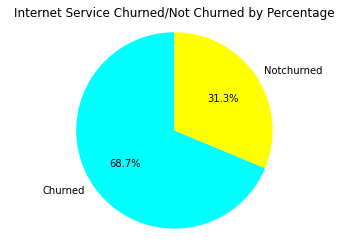

In [19]:
data = [x, y]
label = ['Churned', 'Notchurned']
 
plt.pie(data, labels=label, autopct='%1.1f%%', shadow=False, colors=['cyan', 'yellow'], radius=3, startangle=90)
plt.title('Internet Service Churned/Not Churned by Percentage')
plt.axis('equal')
plt.show()

In [20]:
tv_subscriber_churned  = len(df[(df['tv_subscriber'] == 1) & (df['churn'] == 1)])
tv_subscriber_churned

22785

In [21]:
tv_subscriber_not_churned  = len(df[(df['tv_subscriber'] == 1) & (df['churn'] == 0)])
tv_subscriber_not_churned

14774

In [22]:
not_tv_subscriber_churned  = len(df[(df['tv_subscriber'] == 0) & (df['churn'] == 1)])
not_tv_subscriber_churned

10501

In [23]:
not_tv_subscriber_not_churned  = len(df[(df['tv_subscriber'] == 0) & (df['churn'] == 0)])
not_tv_subscriber_not_churned

376

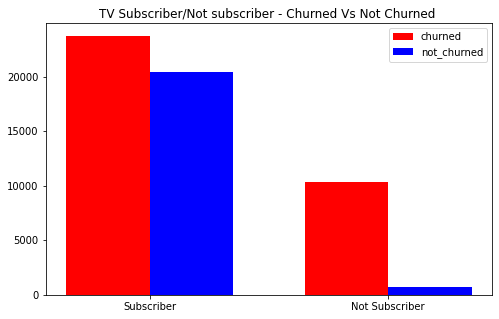

In [24]:
labels = ['Subscriber', 'Not Subscriber']
churn = [23721, 10369]
no_churn = [20457, 725 ]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
plt.figure(figsize=(8,5))
plt.bar(x - width/2, churn, width, label='churned', color='red')
plt.bar(x + width/2, no_churn, width, label='not_churned', color='blue')
plt.xticks(x, labels)
plt.title('TV Subscriber/Not subscriber - Churned Vs Not Churned ')
plt.legend()
plt.show()

In [25]:
movie_subscriber_churned  = len(df[(df['movie_subscriber'] == 1) & (df['churn'] == 1)])
movie_subscriber_churned

5976

In [26]:
movie_subscriber_not_churned  = len(df[(df['movie_subscriber'] == 1) & (df['churn'] == 0)])
movie_subscriber_not_churned

7526

In [27]:
not_movie_subscriber_churned  = len(df[(df['movie_subscriber'] == 0) & (df['churn'] == 1)])
not_movie_subscriber_churned

27310

In [28]:
not_movie_subscriber_not_churned  = len(df[(df['movie_subscriber'] == 0) & (df['churn'] == 0)])
not_movie_subscriber_not_churned

7624

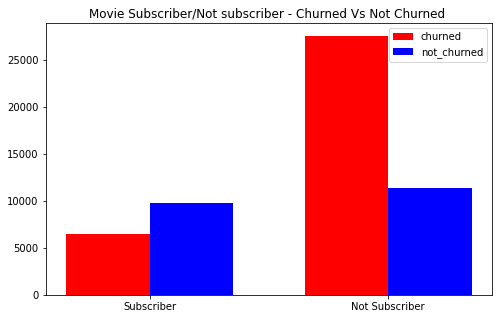

In [29]:
labels = ['Subscriber', 'Not Subscriber']
churn = [6518, 27572]
no_churn = [9783, 11399 ]
c1 = ['red']
c2=['blue'] 

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
plt.figure(figsize=(8,5))
plt.bar(x - width/2, churn, width, label='churned', color=c1)
plt.bar(x + width/2, no_churn, width, label='not_churned', color=c2)
plt.xticks(x, labels)
plt.title('Movie Subscriber/Not subscriber - Churned Vs Not Churned ')
plt.legend()
plt.show()

In [30]:
x = df.groupby(['tv_subscriber', 'movie_subscriber'])['churn'].value_counts()
x

tv_subscriber  movie_subscriber  churn
0              0                 1.0      10499
                                 0.0        376
               1                 1.0          2
1              0                 1.0      16811
                                 0.0       7248
               1                 0.0       7526
                                 1.0       5974
Name: churn, dtype: int64

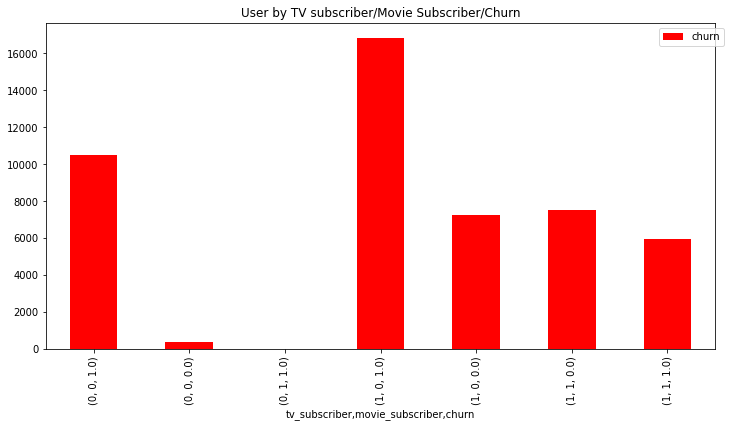

In [31]:
plt.figure(figsize=(12,6))
x.plot(kind='bar', color = 'red', title="User by TV subscriber/Movie Subscriber/Churn").legend(bbox_to_anchor= (1.02, 1))

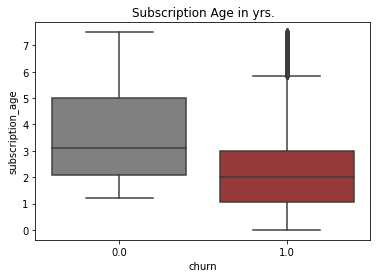

In [32]:
my_colors = ["grey","brown"]
sns.set_palette( my_colors )
sns.boxplot(x="churn",y="subscription_age", data= df)
sns.set(rc={"figure.figsize":(7, 7)})
plt.title('Subscription Age in yrs.')
plt.show()

Here we can see that the customers who has subscription age lies between 1 to 3 years churned more & there are exceptions with customers having high subscription age causing churn. Mostly, customers churned before 3 yrs of substrition age.

Hence, subscription age is an imp criteria for a customer to churn

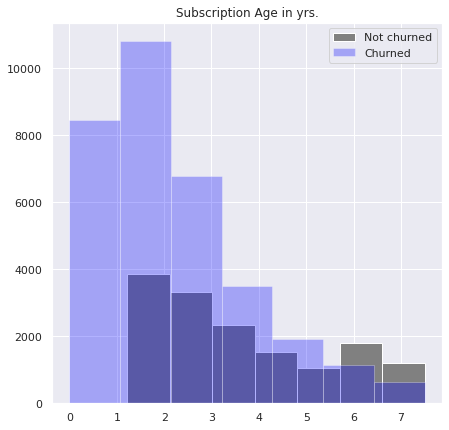

<Figure size 432x360 with 0 Axes>

In [33]:
df[df['churn']==0]['subscription_age'].hist(bins=7, color='grey')
df[df['churn']==1]['subscription_age'].hist(bins=7,color='blue', alpha=0.3)
plt.legend(['Not churned', 'Churned'])
plt.title('Subscription Age in yrs.')
plt.figure(figsize=(6,5))
plt.show()

We can see that the most of the customers who has churned has subscription age lies between 1 to 3 years & there are some customers with higher subscription age who has churned

In [34]:
no_contract_no_churned = len(df[(df['remaining_contract'].isnull()) & (df['churn'] == 0)])
no_contract_no_churned

1064

In [35]:
no_contract_churned = len(df[(df['remaining_contract'].isnull()) & (df['churn'] == 1)])
no_contract_churned

17383

In [36]:
contract_over_churned  = len(df[(df['remaining_contract']==0) & (df['churn'] == 1)])
contract_over_churned

13690

In [37]:
contract_over_not_churned  = len(df[(df['remaining_contract'] == 0.0) & (df['churn'] == 0)])
contract_over_not_churned

47

In [38]:
contract_remain_not_churned = len(df[~(df['remaining_contract'].isnull()) & (df['remaining_contract'] != 0.0) & (df['churn'] == 0)])
contract_remain_not_churned

14039

In [39]:
contract_remain_churned = len(df[~(df['remaining_contract'].isnull()) & (df['remaining_contract'] != 0.0) & (df['churn'] == 1)])
contract_remain_churned

2213

In [40]:
c1 = ['red']
c2=['grey'] 

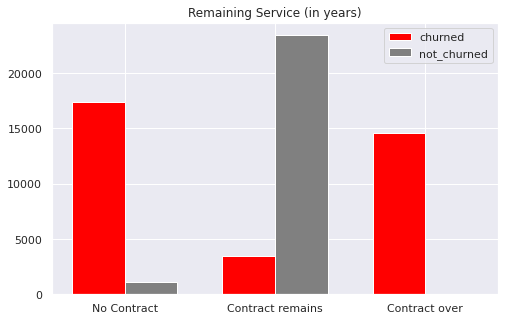

In [41]:
labels = ['No Contract','Contract remains', 'Contract over']
churn = [17381, 3439, 14555]
no_churn = [1131, 23376, 51]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
plt.figure(figsize=(8,5))
plt.bar(x - width/2, churn, width, label='churned',color = c1)
plt.bar(x + width/2, no_churn, width, label='not_churned',color = c2)
plt.xticks(x, labels)
plt.title('Remaining Service (in years)')
plt.legend()
plt.show()


Here, we can see that the customers who doesn't have any contract are more likely to churn than the customers who have contracts there are very few customers who cancelled the subscription(or churned) before the contract got over and very less customers are there who doesn't churned after the contract got over, means customer retention is very less. So, remaining contract is imp factor for predicting a customer to churn

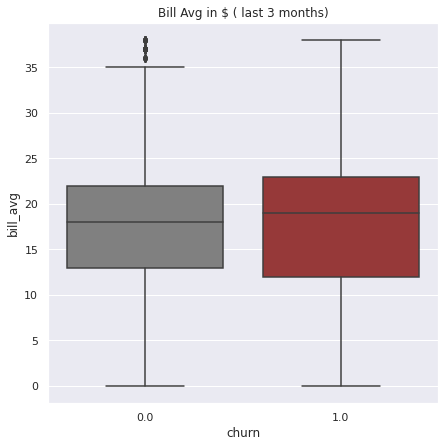

In [42]:
my_colors = ["grey","brown"]
sns.set_palette( my_colors )
sns.boxplot(x="churn",y="bill_avg",data=df )
sns.set(rc={"figure.figsize":(10, 7)})
plt.title('Bill Avg in $ ( last 3 months)')
plt.show() 

Here, we can see that the average bill lies between $0 to $30, it is seen that the customers with higher average bill are more likely to churn, however there are exception also where the customers with higher bill didn't churn

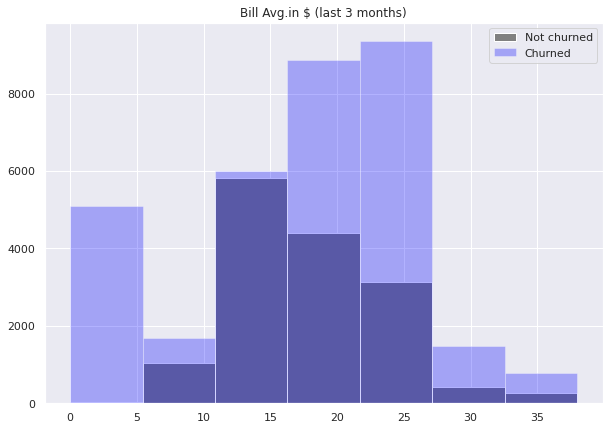

<Figure size 432x360 with 0 Axes>

In [43]:
df[df['churn']==0]['bill_avg'].hist(bins=7, color='grey')
df[df['churn']==1]['bill_avg'].hist(bins=7,color='blue', alpha=0.3)
plt.legend(['Not churned', 'Churned'])
plt.title('Bill Avg.in $ (last 3 months)')
plt.figure(figsize=(6,5))
plt.show()

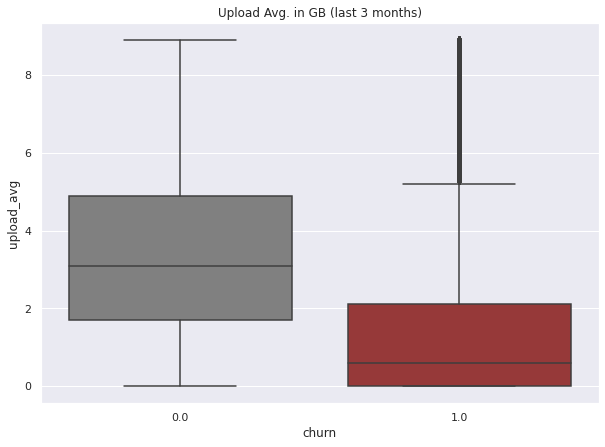

In [44]:
my_colors = ["grey","brown"]
sns.set_palette( my_colors )
sns.boxplot(x="churn",y="upload_avg",data= df)
sns.set(rc={"figure.figsize":(10, 7)})
plt.title('Upload Avg. in GB (last 3 months)')
plt.show()

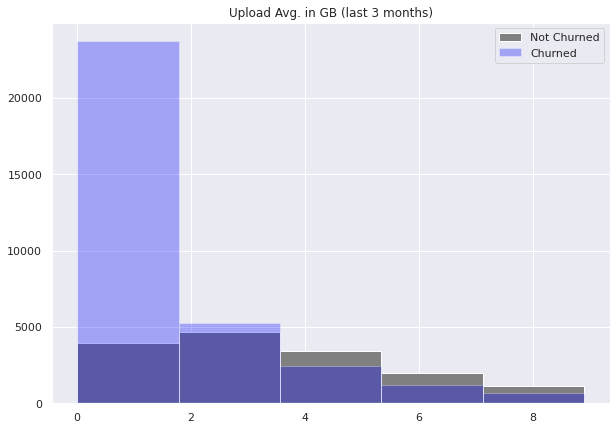

<Figure size 432x360 with 0 Axes>

In [45]:
df[df['churn']==0]['upload_avg'].hist(bins=5, color='grey')
df[df['churn']==1]['upload_avg'].hist(bins=5,color='blue', alpha=0.3)
plt.legend(['Not Churned', 'Churned'])
plt.title('Upload Avg. in GB (last 3 months)')
plt.figure(figsize=(6,5))
plt.show()

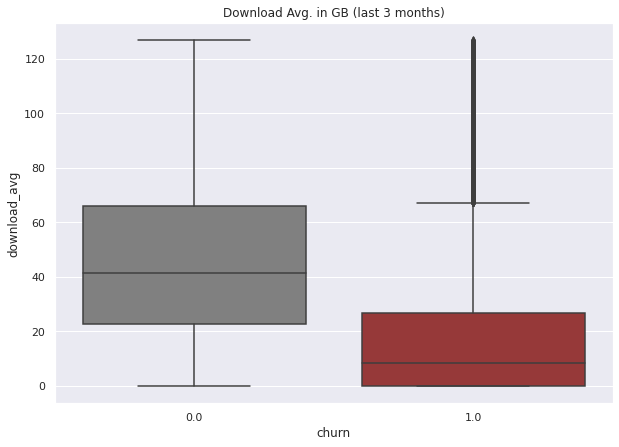

In [46]:
my_colors = ["grey","brown"]
sns.set_palette( my_colors )
sns.boxplot(x="churn",y="download_avg",data= df)
sns.set(rc={"figure.figsize":(10, 7)})
plt.title('Download Avg. in GB (last 3 months)')
plt.show()

Here,as we can see that the customer with higher download average are less likely to churn, whereas the customers whose download average is less, they churned less.

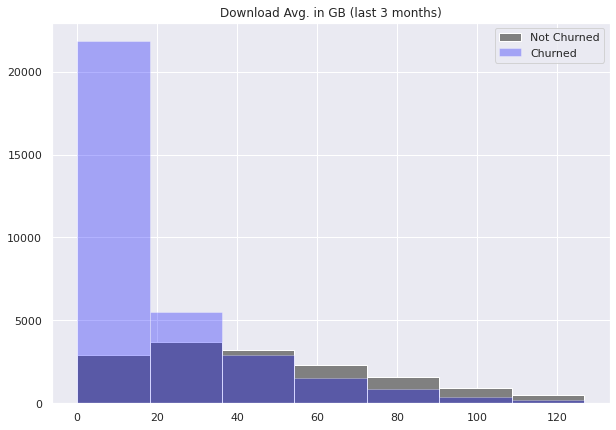

<Figure size 432x360 with 0 Axes>

In [47]:
df[df['churn']==0]['download_avg'].hist(bins=7, color='grey')
df[df['churn']==1]['download_avg'].hist(bins=7,color='blue', alpha=0.3)
plt.legend(['Not Churned', 'Churned'])
plt.title('Download Avg. in GB (last 3 months)')
plt.figure(figsize=(6,5))
plt.show()

From the above we can see that the customers with higher download average churned less and the customers who has less download average are churned more. so, avg download can be a measure for customer churn.

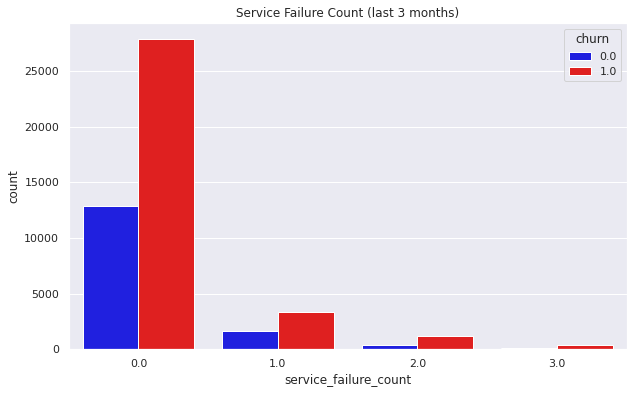

In [48]:
data = df[df['service_failure_count']<4]
plt.figure(figsize = (10,6))
my_colors = ["blue", "red"]
sns.set_palette( my_colors )

sns.countplot(data = data, x = 'service_failure_count', hue = 'churn')
plt.title('Service Failure Count (last 3 months)')
plt.show()

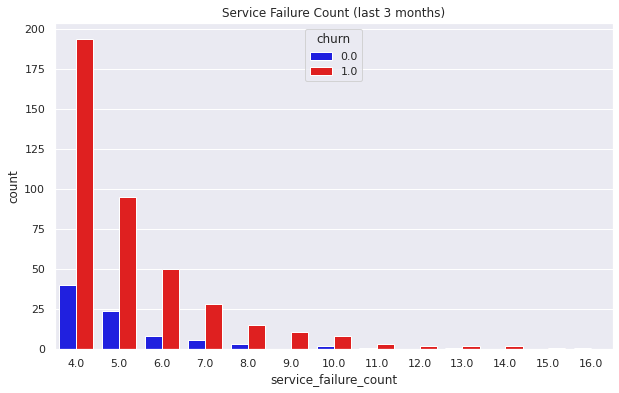

In [49]:
data = df[df['service_failure_count']>=4]
plt.figure(figsize = (10,6))
my_colors = ["blue","red"]
sns.set_palette( my_colors )
sns.countplot(data = data, x = 'service_failure_count', hue = 'churn')
plt.title('Service Failure Count (last 3 months)')
plt.show()

From the above two graphs, we can see that the number of customers who phoned less than 4 times due to failure of service are very high than those who phoned more than 3 times and the number of customers who didn’t phoned are also very high in numbers. And among the number of customers who phoned for service failure only 38% didn’t churned, rest 62%. Churned. So, failure in service can be a factor in less retention of customers.

In [50]:
df.groupby('service_failure_count')['churn'].value_counts()

service_failure_count  churn
0.0                    1.0      27924
                       0.0      12905
1.0                    1.0       3391
                       0.0       1612
2.0                    1.0       1172
                       0.0        405
3.0                    1.0        388
                       0.0        142
4.0                    1.0        194
                       0.0         40
5.0                    1.0         95
                       0.0         24
6.0                    1.0         50
                       0.0          8
7.0                    1.0         28
                       0.0          6
8.0                    1.0         15
                       0.0          3
9.0                    1.0         11
10.0                   1.0          8
                       0.0          2
11.0                   1.0          3
                       0.0          1
12.0                   1.0          2
13.0                   1.0          2
                     

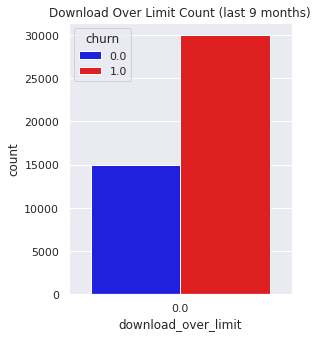

In [51]:
data = df[df['download_over_limit']<1]
plt.figure(figsize = (4,5))
my_colors = ["blue","red"]
sns.set_palette( my_colors )
sns.countplot(data = data, x = 'download_over_limit', hue = 'churn')
plt.title('Download Over Limit Count (last 9 months)')
plt.show()

Among the customers who didn’t exceeded the download limit, number of customers churned is more than the customers who didn’t churned.

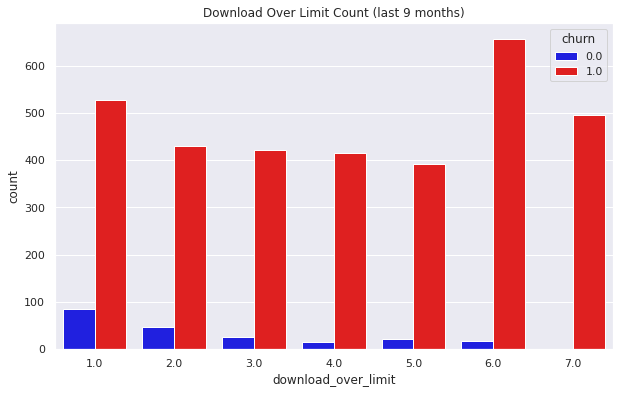

In [52]:
data = df[df['download_over_limit']>=1]
plt.figure(figsize = (10,6))
my_colors = ["blue","red"]
sns.set_palette( my_colors )
sns.countplot(data = data, x = 'download_over_limit', hue = 'churn')
plt.title('Download Over Limit Count (last 9 months)')
plt.show()


From the above graph we can see that among the number of customers who exceeded the download limit, the number of customers who churned is very high than the customers who didn’t churned. We can say that this doesn’t had any effect on the customer churn.

In [53]:
df.groupby('download_over_limit')['churn'].value_counts()

download_over_limit  churn
0.0                  1.0      29948
                     0.0      14934
1.0                  1.0        528
                     0.0         86
2.0                  1.0        430
                     0.0         47
3.0                  1.0        422
                     0.0         27
4.0                  1.0        415
                     0.0         16
5.0                  1.0        391
                     0.0         21
6.0                  1.0        657
                     0.0         18
7.0                  1.0        495
                     0.0          1
Name: churn, dtype: int64

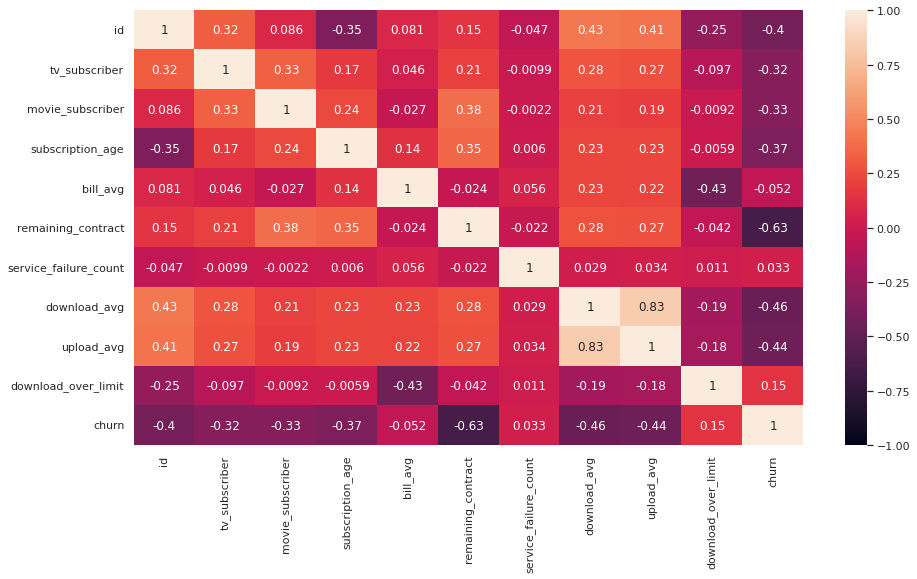

In [54]:
correlation = df.corr()
plt.figure(figsize=(15,8))

sns.heatmap(correlation,vmin=-1,vmax=1,annot=True)
plt.show()

In [70]:
df.head()

,id,tv_subscriber,movie_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
User,,,,,,,,,,,
0,27,0,0,6.87,21,NaN,1.0,0.0,0.0,0.0,1.0
1,34,0,0,6.39,0,NaN,0.0,0.0,0.0,0.0,1.0
2,84,0,0,5.48,14,NaN,1.0,0.0,0.0,0.0,1.0
3,213,0,0,6.64,10,NaN,0.0,0.0,0.0,0.0,1.0
4,222,0,0,5.53,14,NaN,0.0,0.0,0.0,0.0,1.0


In [71]:
from sklearn.model_selection import train_test_split

X = df[['tv_subscriber','subscription_age','bill_avg','service_failure_count',
         'download_avg','upload_avg','download_over_limit']]
y  = df["churn"]



In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [73]:
from sklearn.linear_model import LogisticRegression


In [74]:
clf = LogisticRegression()

In [75]:
clf.fit(X_train, y_train)

LogisticRegression()

In [76]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_train)
accuracy_score(y_train, y_pred)


0.7904143931573514

The customer who is going to churn can be predicted with 79.04% accuracy.

In [78]:
y_pred2 = clf.predict(X_test)
accuracy_score(y_test, y_pred2)

0.7812951620673044

In [80]:
from pprint import pprint as pp
from sklearn.metrics import classification_report
c = classification_report(y_test, y_pred2)
pp(c)

('              precision    recall  f1-score   support\n'
 '\n'
 '         0.0       0.69      0.56      0.62      4579\n'
 '         1.0       0.81      0.88      0.85      9952\n'
 '\n'
 '    accuracy                           0.78     14531\n'
 '   macro avg       0.75      0.72      0.73     14531\n'
 'weighted avg       0.77      0.78      0.77     14531\n')


In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred2)

array([[2576, 2003],
       [1175, 8777]])

In [86]:
confusion_matrix(y_test, y_pred2)
confusion_matrix = pd.crosstab(y_test, y_pred2), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

SyntaxError: ignored